In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Read the CSV file with tab delimiter
file_path = 'data/test.csv'  # Replace with your file path
df = pd.read_csv(file_path, delimiter='\t')

# Display the DataFrame
print(df.head())


                                             reviews  \
0  They start from Equation (4) which is incorrec...   
1  It seems there is no conclusion to take away f...   
2  The authors do not explicitly define continual...   
3  Generally speaking it seems like a lot of tech...   
4  ii) Although the idea of generating contrastiv...   

                                               descs  
0  generalizability of method on datasets created...  
1  Lack of discussion of experimental setup (conc...  
2                      Unclear description of method  
3                          Limited impact of results  
4  The main reason is that from the narration, I ...  


In [8]:
# Read the content of the .txt file
with open('t5-large-output/10/1e-4/generated_predictions.txt', 'r') as file:  # Replace 'file.txt' with the path to your text file
    generated_predictions = file.readlines()  # Read each line into a list

# Check if the rows match
if len(df) == len(generated_predictions):
    # Add the text file content as a new column
    df['pred'] = [line.strip() for line in generated_predictions]
    print("Rows match! Text content added as a new column.")
else:
    print(f"Row mismatch: DataFrame has {len(df)} rows, but the text file has {len(generated_predictions)} lines.")

# Display the updated DataFrame
df.to_csv('vis_test_pred.csv', sep='\t', index=False)

print(df.head())

Rows match! Text content added as a new column.
                                             reviews  \
0  They start from Equation (4) which is incorrec...   
1  It seems there is no conclusion to take away f...   
2  The authors do not explicitly define continual...   
3  Generally speaking it seems like a lot of tech...   
4  ii) Although the idea of generating contrastiv...   

                                               descs  \
0  generalizability of method on datasets created...   
1  Lack of discussion of experimental setup (conc...   
2                      Unclear description of method   
3                          Limited impact of results   
4  The main reason is that from the narration, I ...   

                                                pred  
0  Missing details on methodology (eg., use of no...  
1               Experimental study not strong enough  
2  Missing details on methodology (eg., use of no...  
3        generalizability of results is questionable  
4  

## similarity evaluation

In [4]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import Levenshtein

d:\miniconda3\envs\nlp_lab\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to compute cosine similarity between embeddings
def compute_embedding_similarity(prediction, label):
    pred_embedding = model.encode([prediction])
    label_embedding = model.encode([label])
    return cosine_similarity(pred_embedding, label_embedding)[0][0]

# Function to compute Levenshtein (edit) distance normalized by length
def compute_edit_distance(prediction, label):
    edit_dist = Levenshtein.distance(prediction, label)
    max_len = max(len(prediction), len(label))
    return 1 - (edit_dist / max_len)  # Normalize and return similarity

# Apply embedding similarity and edit distance to the DataFrame
df['embedding_similarity'] = df.apply(
    lambda row: compute_embedding_similarity(row['pred'], row['descs']),
    axis=1
)

df['edit_similarity'] = df.apply(
    lambda row: compute_edit_distance(row['pred'], row['descs']),
    axis=1
)

# Display results
print(df.head())

                                               reviews  \
0    They start from Equation (4) which is incorrec...   
1    It seems there is no conclusion to take away f...   
2    The authors do not explicitly define continual...   
3    Generally speaking it seems like a lot of tech...   
4    ii) Although the idea of generating contrastiv...   
..                                                 ...   
462  It seems that the sampled reconstruction resul...   
463  Table 1 tries to provide some comparisons on A...   
464  - What is the choice of beta in the beta-VAE t...   
465  1. The formulation uses REINFORCE, which is of...   
466  Since the alt-az convolution is not isotropic ...   

                                                 descs  \
0    generalizability of method on datasets created...   
1    Lack of discussion of experimental setup (conc...   
2                        Unclear description of method   
3                            Limited impact of results   
4    The main

In [10]:
print(df.head())

                                             reviews  \
0  They start from Equation (4) which is incorrec...   
1  It seems there is no conclusion to take away f...   
2  The authors do not explicitly define continual...   
3  Generally speaking it seems like a lot of tech...   
4  ii) Although the idea of generating contrastiv...   

                                               descs  \
0  generalizability of method on datasets created...   
1  Lack of discussion of experimental setup (conc...   
2                      Unclear description of method   
3                          Limited impact of results   
4  The main reason is that from the narration, I ...   

                                                pred  embedding_similarity  \
0  Missing details on methodology (eg., use of no...              0.197809   
1               Experimental study not strong enough              0.573512   
2  Missing details on methodology (eg., use of no...              0.392922   
3        gener

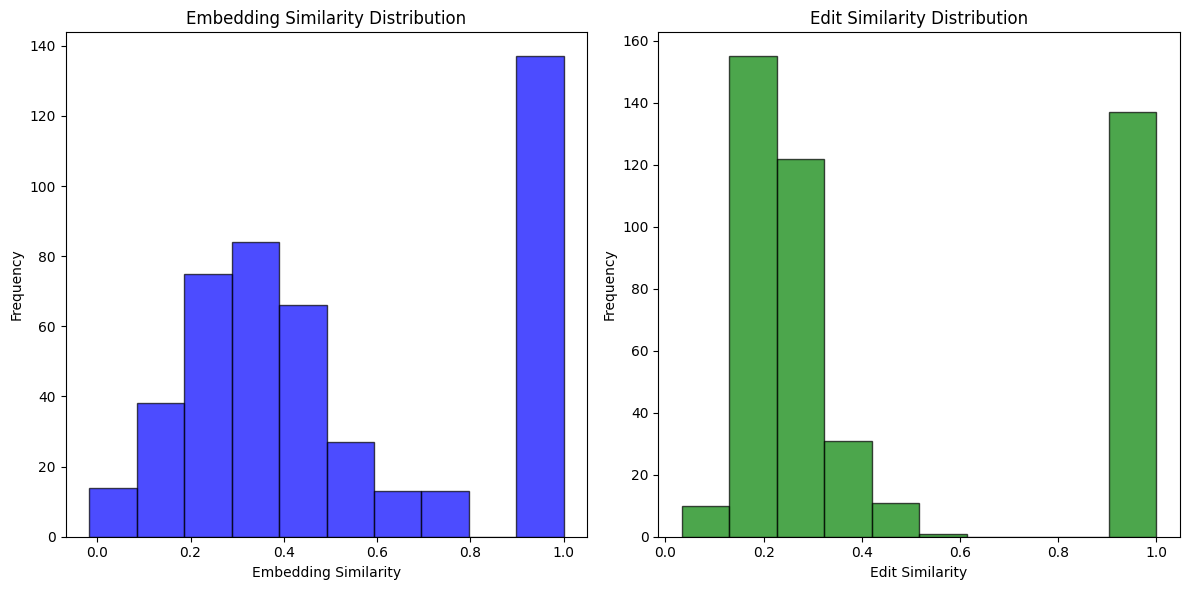

In [11]:
import matplotlib.pyplot as plt


# Plot settings
plt.figure(figsize=(12, 6))

# Embedding similarity histogram
plt.subplot(1, 2, 1)
plt.hist(df['embedding_similarity'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Embedding Similarity Distribution')
plt.xlabel('Embedding Similarity')
plt.ylabel('Frequency')

# Edit similarity histogram
plt.subplot(1, 2, 2)
plt.hist(df['edit_similarity'], bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title('Edit Similarity Distribution')
plt.xlabel('Edit Similarity')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [18]:
mean_similarity = df['embedding_similarity'].mean()
print(f"Mean Similarity: {mean_similarity:.2f}")
mean_distance = df['edit_similarity'].mean()
print(f"Mean Similarity: {mean_distance:.2f}")

Mean Similarity: 0.53
Mean Similarity: 0.46
